In [1]:
import plotly.io as pio

pio.renderers.default = "vscode+jupyterlab+notebook_connected"

# **Project 2: Relationship between GDP and Labor Force of the U.S. (1991-2023)**

## **Overview**
This project focuses on analyzing the relationship between the U.S. GDP and labor force from 1991 to 2023. The objective is to explore the trends and correlation between these two key economic indicators over time. By analyzing the data, I aim to understand how changes in the labor force are associated with fluctuations in GDP, and how this relationship evolves across different periods.

The analysis is based on GDP data available from 1960 to 2023, and labor force data that starts from 1991. While the GDP data spans a much longer period, the availability of labor force data from 1991 onward limits the ability to conduct a full historical analysis. The project includes creating graphs to visualize the upward trends in both the labor force and GDP, as well as investigating the correlation between these variables to better understand their relationship.

### **Data Source**
- **GDP**: Includes GDP data in current US dollars for all countries from 1960 to 2023, sourced from [World Bank Open Data](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD).

- **Labor force**: Includes labor force data for all countries from 1991 to 2023, sourced from [World Bank Open Data](https://data.worldbank.org/indicator/SL.TLF.TOTL.IN?view=chart).

## **Step 1. Data: GDP of the U.S.**

### **1-1. Load a Data**
Load the GDP data from a CSV file, display the structure of the DataFrame, and preview its rows.

In [2]:
import pandas as pd

gdp_df = pd.read_csv("gdp_by_country.csv", header=2)

FileNotFoundError: [Errno 2] No such file or directory: 'gdp_by_country.csv'

In [ ]:
gdp_df.info()
gdp_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            138 non-null    float64
 5   1961            142 non-null    float64
 6   1962            144 non-null    float64
 7   1963            144 non-null    float64
 8   1964            144 non-null    float64
 9   1965            154 non-null    float64
 10  1966            155 non-null    float64
 11  1967            158 non-null    float64
 12  1968            159 non-null    float64
 13  1969            159 non-null    float64
 14  1970            181 non-null    float64
 15  1971            182 non-null    float64
 16  1972            182 non-null    float64
 17  1973            182 non-null    flo

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,2.121696e+10,2.230747e+10,2.370247e+10,2.577938e+10,2.804954e+10,3.037491e+10,...,8.992957e+11,8.298300e+11,9.401055e+11,1.012719e+12,1.006527e+12,9.290741e+11,1.086772e+12,1.183962e+12,1.236163e+12,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,1.450216e+10,NaN,NaN
3,Africa Western and Central,AFW,GDP (current US$),NY.GDP.MKTP.CD,1.188413e+10,1.268566e+10,1.360683e+10,1.443998e+10,1.576911e+10,1.693448e+10,...,7.693673e+11,6.921811e+11,6.857502e+11,7.681896e+11,8.239336e+11,7.871467e+11,8.459930e+11,8.771408e+11,7.965862e+11,NaN
4,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,9.049642e+10,5.276162e+10,7.369015e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.043997e+11,8.472296e+10,NaN


### **1-2. Data Cleaning**

a. Remove unnecessary columns ("Country Code", "Indicator Name", and "Indicator Code") and extract only the data for the United States.

In [ ]:
columns_to_keep = ['Country Name'] + [str(year) for year in range(1960, 2024)]
gdp_df = gdp_df[columns_to_keep]

usa_gdp = gdp_df[gdp_df['Country Name'] == 'United States']
usa_gdp.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
251,United States,5.419886e+11,5.619403e+11,6.036394e+11,6.370586e+11,6.841446e+11,7.419049e+11,8.130328e+11,8.596200e+11,9.402250e+11,...,1.760814e+13,1.829502e+13,1.880491e+13,1.961210e+13,2.065652e+13,2.152140e+13,2.132295e+13,2.359403e+13,2.574411e+13,2.736094e+13


b. The data in wide format is converted into a long format using the melt function. This merged the year columns into a single `Year` column, with corresponding values for GDP placed alongside it.

In [ ]:
usa_gdp_reshaped = usa_gdp.melt(id_vars=['Country Name'], var_name='Year', value_name='GDP')
usa_gdp_reshaped.head()

,Country Name,Year,GDP
0,United States,1960,5.419886e+11
1,United States,1961,5.619403e+11
2,United States,1962,6.036394e+11
3,United States,1963,6.370586e+11
4,United States,1964,6.841446e+11


## **Step 2. Data: Labor Force of the U.S.**

### **2-1. Load a Data**
Load the labor force data from a CSV file, display the structure of the DataFrame, and preview its rows.

In [ ]:
import pandas as pd

labor_df = pd.read_csv("labor_by_country.csv", header=2)

In [ ]:
labor_df.info()
labor_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 69 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    266 non-null    object 
 1   Country Code    266 non-null    object 
 2   Indicator Name  266 non-null    object 
 3   Indicator Code  266 non-null    object 
 4   1960            0 non-null      float64
 5   1961            0 non-null      float64
 6   1962            0 non-null      float64
 7   1963            0 non-null      float64
 8   1964            0 non-null      float64
 9   1965            0 non-null      float64
 10  1966            0 non-null      float64
 11  1967            0 non-null      float64
 12  1968            0 non-null      float64
 13  1969            0 non-null      float64
 14  1970            0 non-null      float64
 15  1971            0 non-null      float64
 16  1972            0 non-null      float64
 17  1973            0 non-null      flo

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,ABW,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,241468428.0,248638349.0,255956115.0,263150918.0,270995141.0,276110533.0,285907674.0,295773409.0,305240423.0,NaN
2,Afghanistan,AFG,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,8630724.0,8913938.0,9254593.0,9242721.0,9220323.0,9105733.0,9356574.0,8803873.0,8920521.0,NaN
3,Africa Western and Central,AFW,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,142375596.0,146463779.0,149976582.0,154203991.0,158547164.0,161605111.0,166806489.0,173133251.0,178686576.0,NaN
4,Angola,AGO,"Labor force, total",SL.TLF.TOTL.IN,NaN,NaN,NaN,NaN,NaN,NaN,...,11623549.0,12011479.0,12415650.0,12825924.0,13246117.0,13728470.0,14445598.0,14746279.0,15222540.0,NaN


### **2-2. Data Cleaning**

a. Remove unnecessary columns ("Country Code", "Indicator Name", and "Indicator Code") and extract only the data for the United States.

In [ ]:
columns_to_keep1 = ['Country Name'] + [str(year) for year in range(1960, 2024)]
labor_df = labor_df[columns_to_keep1]

usa_labor = labor_df[labor_df['Country Name'] == 'United States']
usa_labor.head()

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
251,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,159540139.0,160644681.0,162448669.0,163971527.0,165307010.0,167100511.0,165649358.0,166198588.0,168181985.0,170548899.0


b. Remove columns that have no data (i.e., columns where all values are `NaN`)

In [ ]:
usa_labor = usa_labor.dropna(axis=1, how='all')
usa_labor.head()

,Country Name,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
251,United States,128277990.0,130387356.0,131792391.0,134076659.0,135975697.0,138055157.0,140577814.0,142198651.0,144105404.0,...,159540139.0,160644681.0,162448669.0,163971527.0,165307010.0,167100511.0,165649358.0,166198588.0,168181985.0,170548899.0


c. The data in wide format is converted into a long format using the melt function. This merged the year columns into a single "Year" column, with corresponding values for Labor force placed alongside it.

In [ ]:
usa_labor_reshaped = usa_labor.melt(id_vars=['Country Name'], var_name='Year', value_name='Labor force')
usa_labor_reshaped.head()

,Country Name,Year,Labor force
0,United States,1991,128277990.0
1,United States,1992,130387356.0
2,United States,1993,131792391.0
3,United States,1994,134076659.0
4,United States,1995,135975697.0


## **3. Merge the Datasets**

### **3-1. Merge**
Merge the two datasets based on `Year`.

In [ ]:
merged_df = pd.merge(usa_gdp_reshaped, usa_labor_reshaped, on='Year', how='inner')
merged_df.head()

,Country Name_x,Year,GDP,Country Name_y,Labor force
0,United States,1991,6.158129e+12,United States,128277990.0
1,United States,1992,6.520327e+12,United States,130387356.0
2,United States,1993,6.858559e+12,United States,131792391.0
3,United States,1994,7.287236e+12,United States,134076659.0
4,United States,1995,7.639749e+12,United States,135975697.0


### **3-2. Cleaning**

Standardizes the Country Name_x column to Country Name, removes the duplicate Country Name_x and Country Name_y columns, and ultimately retains only the Year, GDP, and Labor force columns in the dataset.

In [ ]:
merged_df['Country Name'] = merged_df['Country Name_x']  
merged_df = merged_df.drop(['Country Name_x', 'Country Name_y'], axis=1)
merged_df = merged_df[['Year', 'GDP', 'Labor force']]
merged_df.head()

,Year,GDP,Labor force
0,1991,6.158129e+12,128277990.0
1,1992,6.520327e+12,130387356.0
2,1993,6.858559e+12,131792391.0
3,1994,7.287236e+12,134076659.0
4,1995,7.639749e+12,135975697.0


## **4. Data visualization**

### **4-1. GDP Trend**

Creates a line graph to visualize the GDP in the U.S. from 1991 to 2023. I use the `plotly.express` library to plot GDP values against years, with appropriate axis labels and markers.

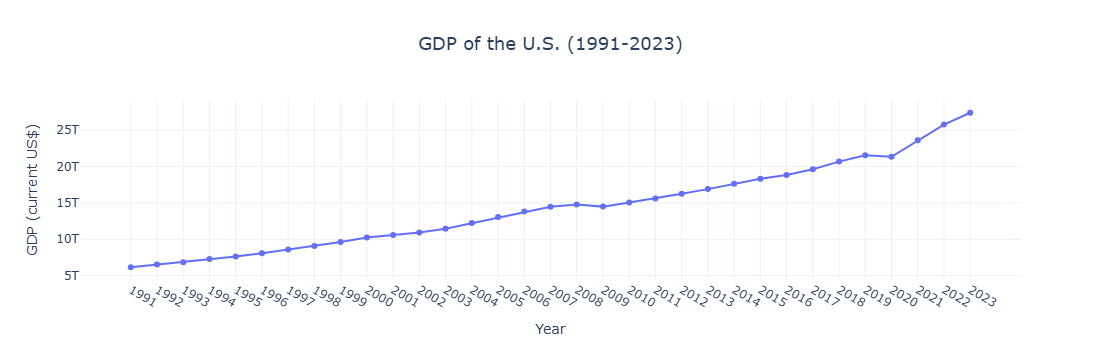

In [ ]:
import plotly.express as px

fig_gdp = px.line(
    merged_df,  
    x='Year',  
    y='GDP',  
    title='GDP of the U.S. (1991-2023)',  
    labels={'GDP': 'GDP (current US$)', 'Year': 'Year'},  
    markers=True  
)

fig_gdp.update_layout(
    xaxis_title="Year",  
    yaxis_title="GDP (current US$)",  
    template="plotly_white",  
    title_font_size=18,  
    title_x=0.5,  
    font=dict(size=12)  
)

fig_gdp.show()

### **4-2. Labor Force Trend**

Creates a line graph to visualize the labor force in the U.S. from 1991 to 2023. I use the `plotly.express` library to plot labor force values against years, with appropriate axis labels and markers.

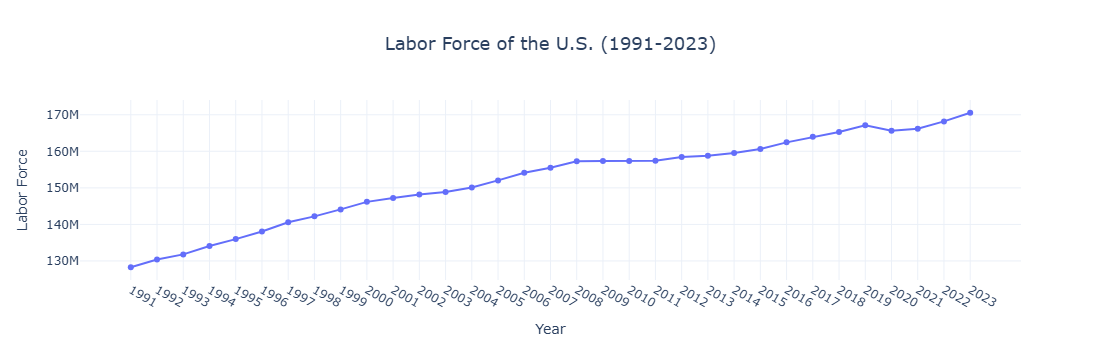

In [ ]:
import plotly.express as px

fig_labor = px.line(
    merged_df,  
    x='Year',  
    y='Labor force',  
    title='Labor Force of the U.S. (1991-2023)',  
    labels={'Labor Force': 'Labor Force', 'Year': 'Year'},  
    markers=True  
)

fig_labor.update_layout(
    xaxis_title="Year",  
    yaxis_title="Labor Force",  
    template="plotly_white",  
    title_font_size=18,  
    title_x=0.5,  
    font=dict(size=12)  
)

fig_labor.show()

### **4-3. Relationship between GDP and Labor Force**

Creates a graph to show the relationship between GDP and Labor Force in the U.S. from 1991 to 2023. The GDP is plotted on the primary y-axis (left), while Labor Force is plotted on a secondary y-axis (right), allowing both trends to be visualized on the same graph with different scales.

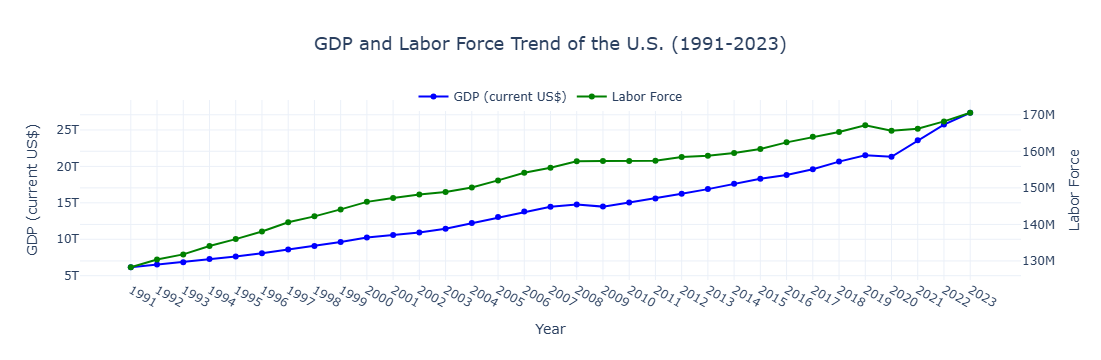

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=merged_df['Year'],
    y=merged_df['GDP'],
    mode='lines+markers',
    name='GDP (current US$)',
    line=dict(color='blue'),
))

fig.add_trace(go.Scatter(
    x=merged_df['Year'],
    y=merged_df['Labor force'],
    mode='lines+markers',
    name='Labor Force',
    line=dict(color='green'),
    yaxis='y2',  # Use secondary y-axis for Labor Force
))

fig.update_layout(
    title="GDP and Labor Force Trend of the U.S. (1991-2023)",
    xaxis_title="Year",
    yaxis_title="GDP (current US$)",
    yaxis2=dict(
        title="Labor Force",
        overlaying="y",  
        side="right",    
    ),
    template="plotly_white",
    title_font_size=18,
    title_x=0.5,
    font=dict(size=12),
    legend=dict(x=0.5, xanchor='center', y=1.1, orientation='h')
)

fig.show()

### **4-4. Correlation between GDP and Labor Force**

The correlation graph between GDP and Labor Force visualizes how changes in the labor force impact economic output (GDP). This helps assess the strength and direction of this relationship using a scatter plot with a trendline to identify patterns over time.

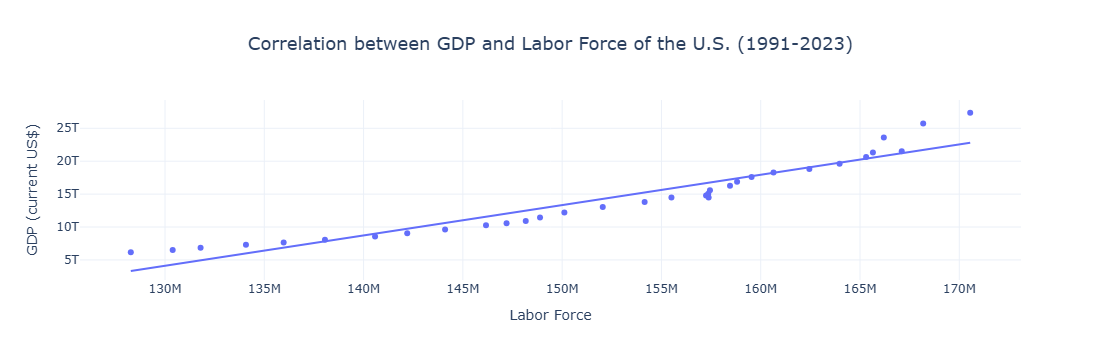

In [ ]:
fig_scatter = px.scatter(
    merged_df,
    x='Labor force',  
    y='GDP',
    title='Correlation between GDP and Labor Force of the U.S. (1991-2023)',
    labels={'Labor force': 'Labor Force', 'GDP': 'GDP (current US$)'},
    trendline="ols"  
)

fig_scatter.update_layout(
    xaxis_title="Labor Force",  
    yaxis_title="GDP (current US$)",  
    template="plotly_white",
    title_font_size=18,
    title_x=0.5,
    font=dict(size=12)
)

fig_scatter.show()

## **5. Conclusion**

In conclusion, the graphs reveal a positive relationship between the U.S. labor force and GDP from 1991 to 2023. The correlation graph indicates a moderate to strong positive correlation, with GDP tending to increase as the labor force grows. 

However, some outliers, particularly in the years with unusually high labor force growth, may be due to factors such as changes in labor force participation rates, shifts in demographic trends, or economic events that temporarily disrupted the usual growth patterns. 

Additionally, the labor force data is available only from 1991 onward, which limits the ability to analyze the relationship between labor force and GDP prior to that period. 

The trend graph shows a clear upward trajectory for both GDP and the labor force, with the labor force growing at a faster rate in recent years. This suggests that while labor force growth generally contributes to economic output, changes in productivity or economic dynamics could be influencing the recent trends.

**Implications for the future**: 

Given the observed trends, policymakers and economists should consider the potential for continued labor force growth and its impact on economic output. If labor force participation continues to grow at a faster rate than GDP, it may signal the need for increased focus on productivity-enhancing measures to ensure sustainable economic growth. 

Furthermore, attention should be given to the factors contributing to the outliers, as they may represent emerging trends or disruptions in the labor market that could require targeted policy interventions. 

Future analyses should also account for more granular data and explore the relationship between labor force growth and other factors such as technological advancements, automation, and demographic shifts to better forecast long-term economic outcomes.